# Binned Training Notebook (Refactored)

This refactored version uses modular classes to reduce code duplication and improve maintainability.
The original functionality is preserved but organized into:

- `DataLoader`: Handles data loading and feature detection
- `KinematicReweighter`: Manages all reweighting operations
- `ModelBuilder`: Creates model pipelines
- `BinnedTrainingPlotter`: Generates all plots
- `BinnedTrainingPipeline`: Main orchestration class

## Libraries and Dependencies

**Core Data Science Libraries:**
- `numpy>=1.21.0`: Numerical computing and array operations
- `pandas>=1.3.0`: Data manipulation and analysis
- `scikit-learn>=1.0.0`: Machine learning algorithms and utilities
- `scipy>=1.7.0`: Scientific computing and statistical functions

**Machine Learning:**
- `xgboost>=1.5.0`: Gradient boosting framework for BDT training
- `joblib>=1.1.0`: Parallel processing and model persistence

**Data I/O:**
- `uproot>=4.0.0`: ROOT file reading for physics data
- `PyYAML>=6.0`: Configuration file parsing

**Visualization:**
- `matplotlib>=3.5.0`: Basic plotting and visualization
- `seaborn>=0.11.0`: Statistical data visualization

## Code Architecture and Flow

**Main Entry Point:**
```python
from main_training import BinnedTrainingPipeline
```

**Class Dependencies:**
1. **`BinnedTrainingPipeline`** (main_training.py) - Main orchestrator
   - Calls: `DataLoader`, `KinematicReweighter`, `ModelBuilder`, `BinnedTrainingPlotter`
   - Manages: Configuration, training workflow, results collection

2. **`DataLoader`** (data_loader.py) - Data handling
   - Reads: ROOT files via uproot
   - Processes: Feature detection, data splitting
   - Outputs: Training/validation datasets

3. **`KinematicReweighter`** (reweighting.py) - Physics reweighting
   - Applies: pT, η, and vertex-based reweighting
   - Uses: scipy.stats for statistical operations
   - Integrates: With DataLoader for seamless workflow

4. **`ModelBuilder`** (model_builder.py) - ML pipeline creation
   - Creates: scikit-learn compatible pipelines
   - Integrates: XGBoost classifiers with preprocessing
   - Handles: Feature selection and model persistence

5. **`BinnedTrainingPlotter`** (plotting.py) - Visualization
   - Generates: Training metrics, correlation plots, efficiency curves
   - Uses: matplotlib/seaborn for plotting
   - Outputs: PNG files and ROOT histograms

**Configuration Flow:**
```yaml
config.yaml → BinnedTrainingPipeline → Individual Classes
```

## Memory Optimization with XGBoost

The pipeline now uses memory-saving XGBoost parameters:

- **subsample: 0.5** - Uses only 50% of data per tree (reduces memory by ~50%)
- **subsample_bynode: 0.7** - Uses 70% of data per node
- **colsample_bytree: 0.6** - Uses 60% of features per tree
- **colsample_bylevel: 0.7** - Uses 70% of features per level
- **colsample_bynode: 0.8** - Uses 80% of features per node
- **max_bin: 256** - Reduced binning precision for memory efficiency
- **grow_policy: lossguide** - Memory-efficient tree growing strategy

These settings can reduce memory usage by 30-60% while maintaining model performance.

## Model Output Formats

The pipeline supports multiple model output formats:

- **Joblib** (`.joblib`): Python/sklearn format for use with Python analysis
- **TMVA/ROOT** (`.root`): ROOT format for integration with C++ analysis code
- **JSON** (`.json`): XGBoost native format for cross-platform compatibility

Configure output formats in `config.yaml`:
```yaml
output:
  save_models: true    # Joblib format
  save_tmva: true      # ROOT/TMVA format
  save_plots: true     # Analysis plots
```

In [1]:
# Import the refactored classes
#cd to the ppg path
import os
os.chdir('/sphenix/user/shuhangli/ppg12/FunWithxgboost')


from main_training import BinnedTrainingPipeline
import yaml

# Verify configuration
with open('config.yaml', 'r') as f:
    config = yaml.safe_load(f)
print("Configuration loaded successfully")
print(f"Training mode: {'Single model' if config['training']['train_single_model'] else 'Per-bin models'}")
print(f"Bins: {config['binning']['labels']}")

print("\n=== Plotting Features ===")
if config['reweighting'].get('vertex_reweight', False):
    print("✓ Vertex reweighting plots will be included in global QA")
else:
    print("• To see vertex before/after plots, set vertex_reweight: true")
    print("• Test with config_vertex_test.yaml to see vertex features")

Configuration loaded successfully
Training mode: Single model
Bins: ['6_10', '10_15', '15_20', '20_25', '25_35']

=== Plotting Features ===
• To see vertex before/after plots, set vertex_reweight: true
• Test with config_vertex_test.yaml to see vertex features


=== Testing New 2D Correlation Plots ===
=== Memory Usage Monitoring ===
Memory usage: 6218.5 MB
--- Running Training ---
=== Starting Binned Training Pipeline ===
Using pt binning with 5 bins: ['6_10', '10_15', '15_20', '20_25', '25_35']
--- Loading and reweighting all data globally ---
ET distribution flattening: 355060/771851 samples kept (<15.0 GeV, 20 bins, min_count=17753)
ET distribution flattening: 398020/1029900 samples kept (<15.0 GeV, 20 bins, min_count=19901)
ET distribution flattening: 194540/714649 samples kept (<15.0 GeV, 20 bins, min_count=9727)
ET distribution flattening: 71720/431863 samples kept (<15.0 GeV, 20 bins, min_count=3586)
ET distribution flattening: 8840/160275 samples kept (<15.0 GeV, 20 bins, min_count=442)
Loaded single file set with 9057965 samples for global processing
DEBUG: apply_vertex_reweighting called for label 0
DEBUG: vertex_reweight config = False
DEBUG: 'vertexz' in df = True
DEBUG: Vertex reweighting disabled, skipping
DEBUG: apply_vertex_re

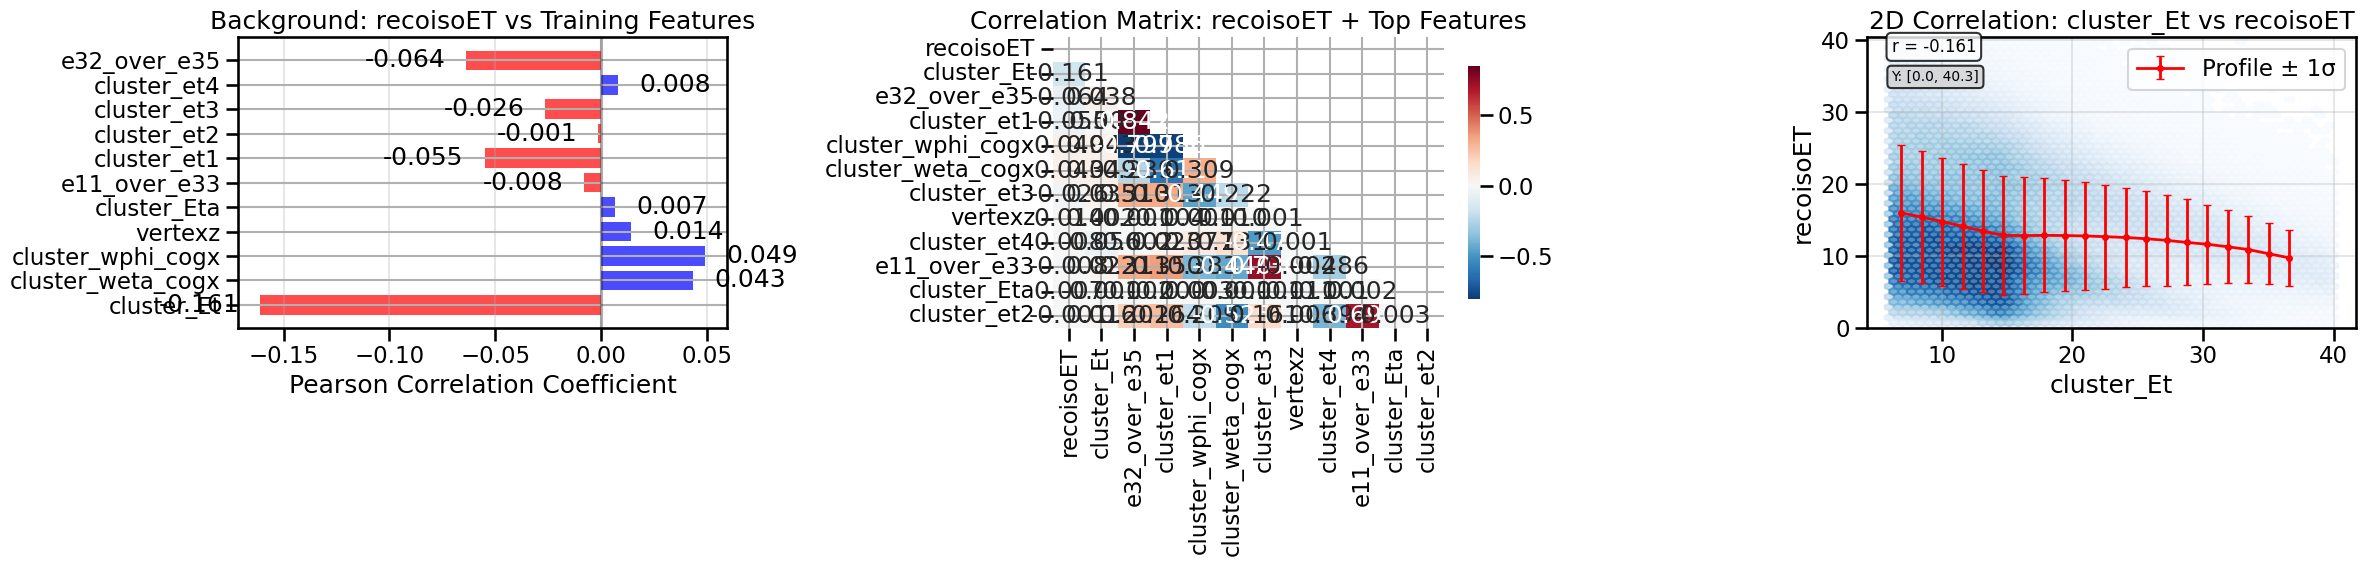

  Y-axis zoom: recoisoET range [0.00, 40.31] (1787757/1793697 points)
  Y-axis zoom: recoisoET range [0.00, 40.31] (1787757/1793697 points)
  Y-axis zoom: recoisoET range [0.00, 40.31] (1787757/1793697 points)
  Y-axis zoom: recoisoET range [0.00, 40.31] (1787757/1793697 points)
  Y-axis zoom: recoisoET range [0.00, 40.31] (1787757/1793697 points)
  Y-axis zoom: recoisoET range [0.00, 40.31] (1787757/1793697 points)
Saved 2D correlation grid: binned_models/2d_correlations_background.pdf


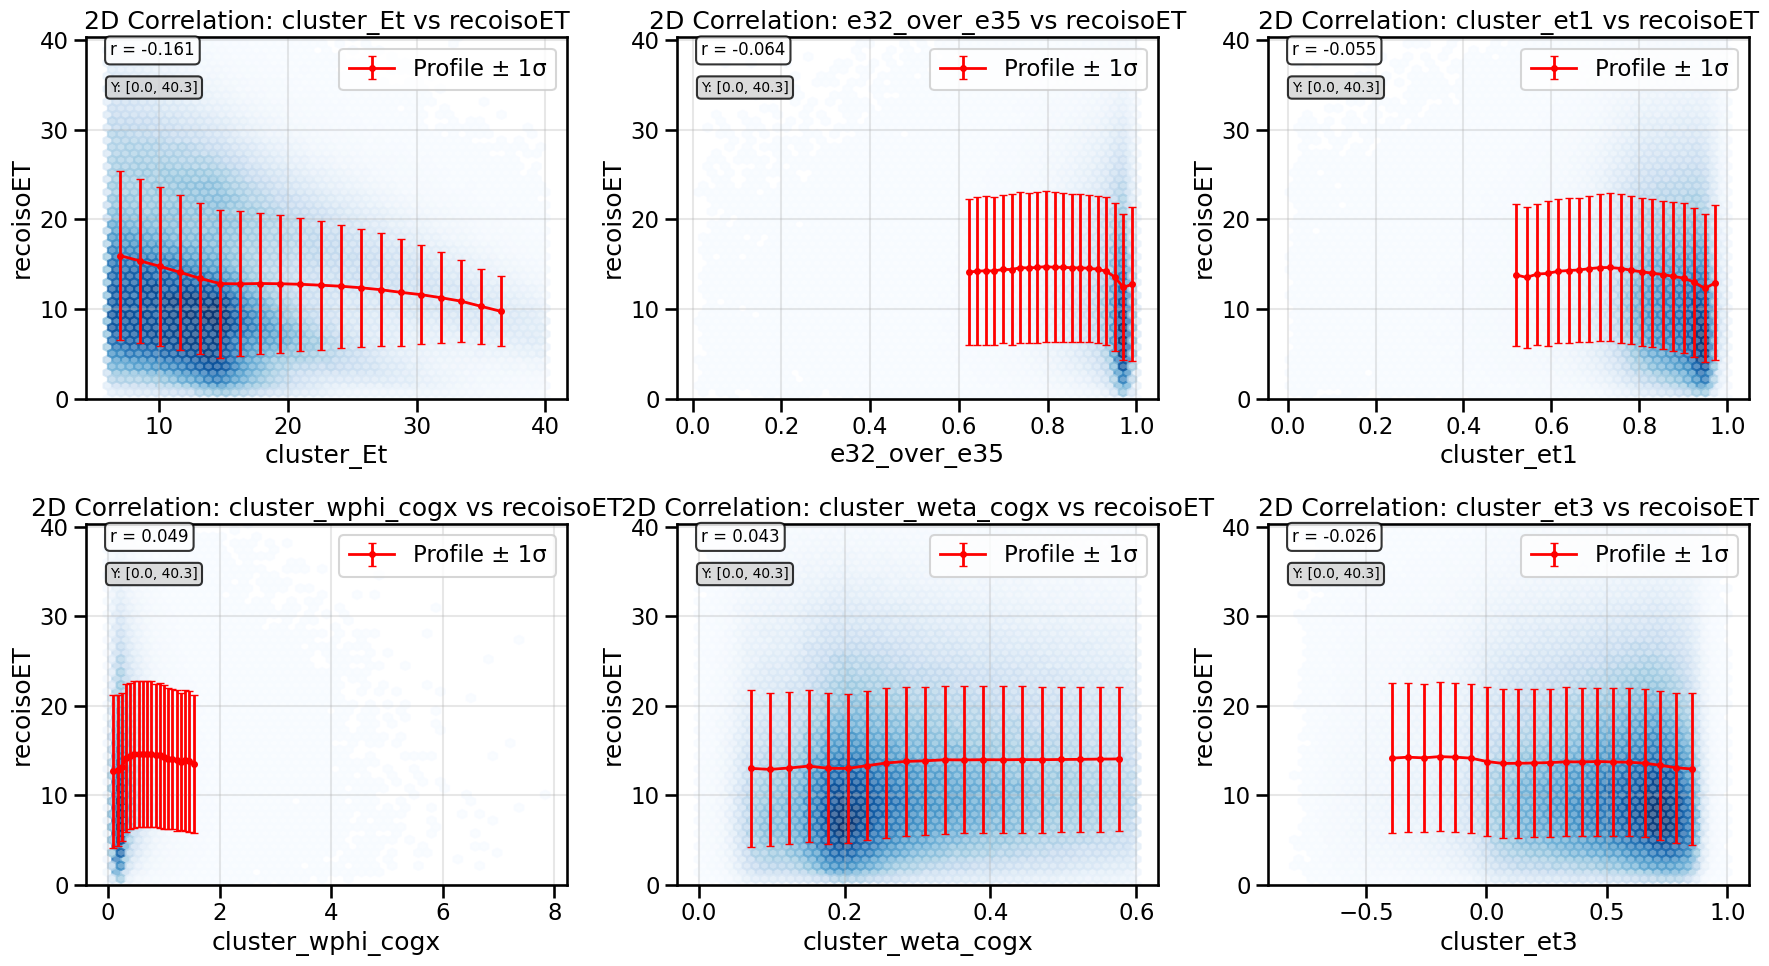

Saved correlation results: binned_models/feature_correlations_background.csv

=== Training a single model for all pt bins ===
Data split: 6340575 train, 905797 validation, 1811593 test samples

=== Training with Default Hyperparameters (tuning disabled) ===
=== Training Complete ===
Memory usage: 10870.8 MB
Memory usage: 10870.8 MB
--- Evaluating Models ---
=== Evaluating Models on Test Set ===
Bin 6_10: Test AUC = 0.9013
Bin 10_15: Test AUC = 0.9349
Bin 15_20: Test AUC = 0.9224
Bin 20_25: Test AUC = 0.9245
Bin 25_35: Test AUC = 0.9238
Memory usage: 10870.3 MB
Memory usage: 10870.3 MB
--- Debug: Checking Data Structure ---
Number of trained pipelines: 5
Bin 6_10:
  - df_bin shape: (9057965, 33)
  - df_bin columns: ['cluster_Et', 'cluster_Eta', 'cluster_Phi', 'vertexz', 'e11_over_e33', 'e32_over_e35', 'e11_over_e22', 'e11_over_e13', 'e11_over_e15', 'e11_over_e17', 'e11_over_e31', 'e11_over_e51', 'e11_over_e71', 'e22_over_e33', 'e22_over_e35', 'e22_over_e37', 'e22_over_e53', 'cluster_pro

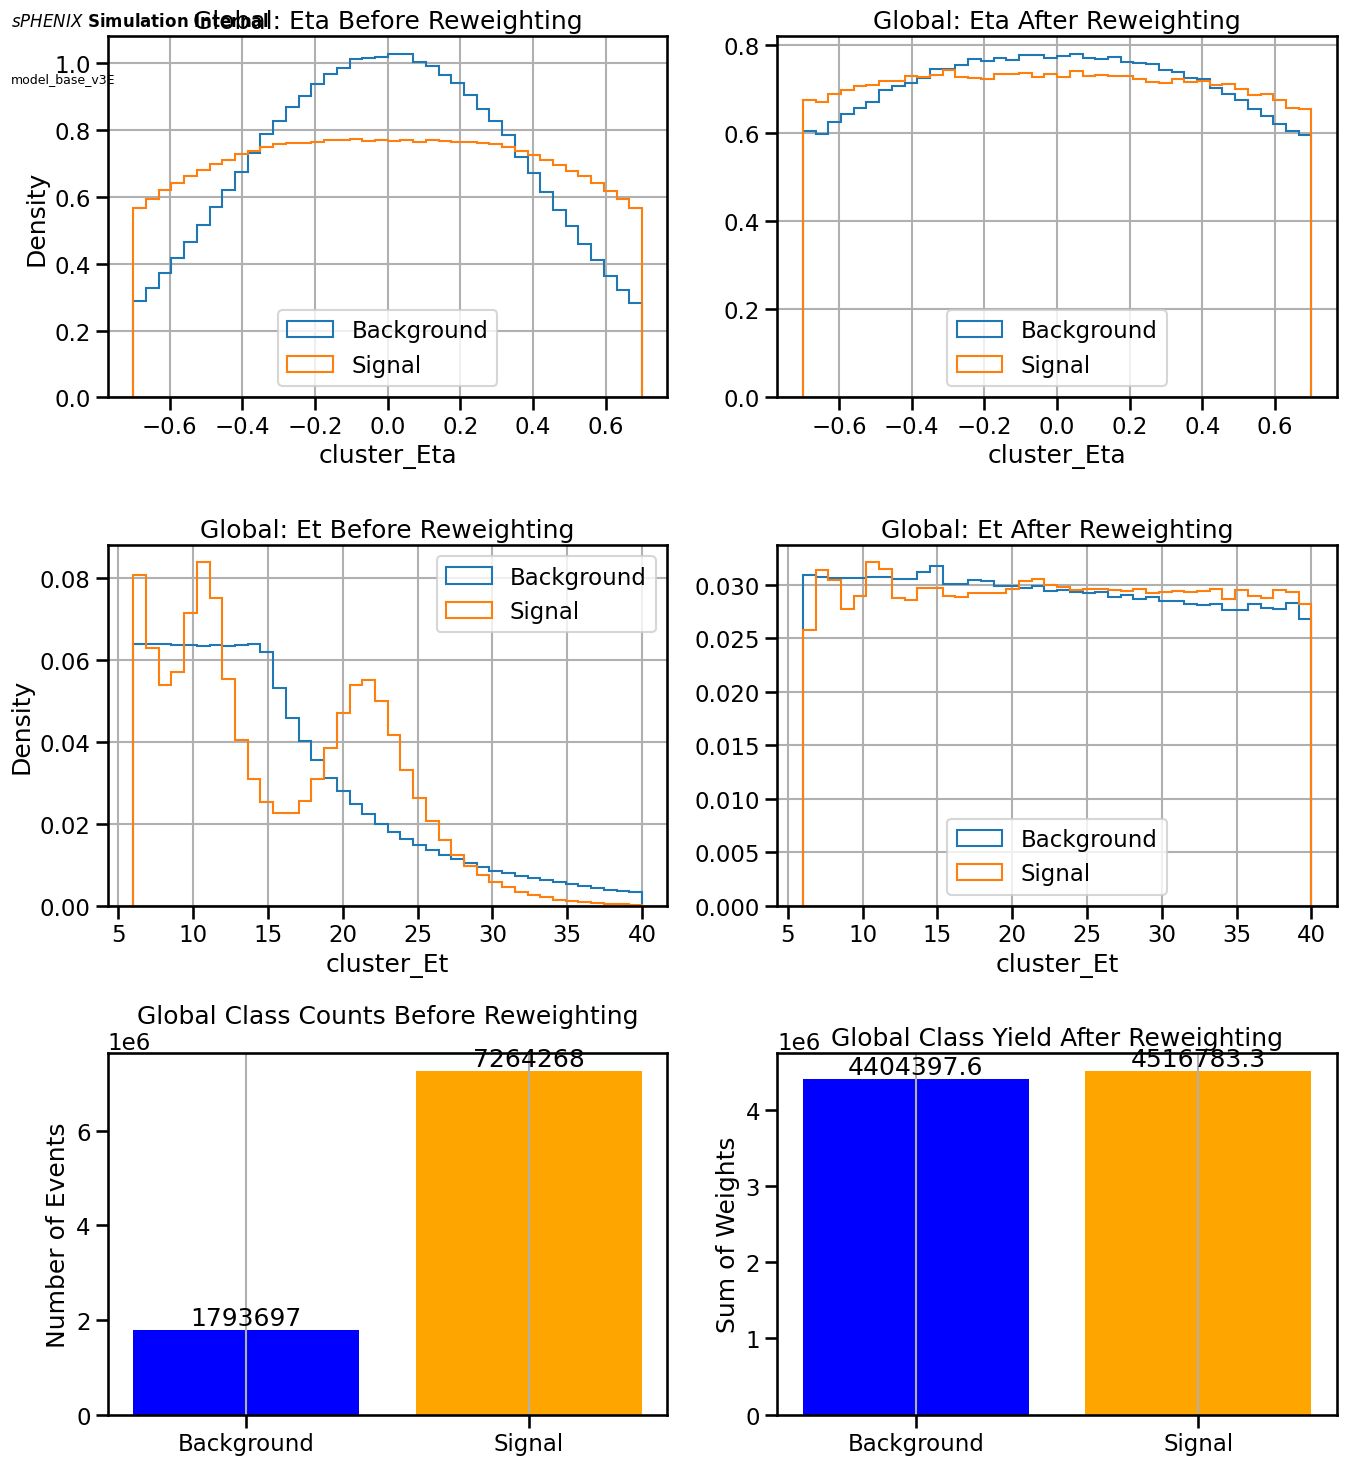

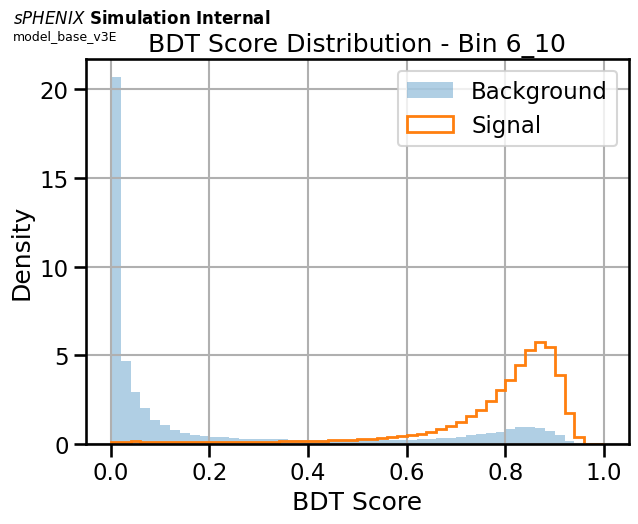

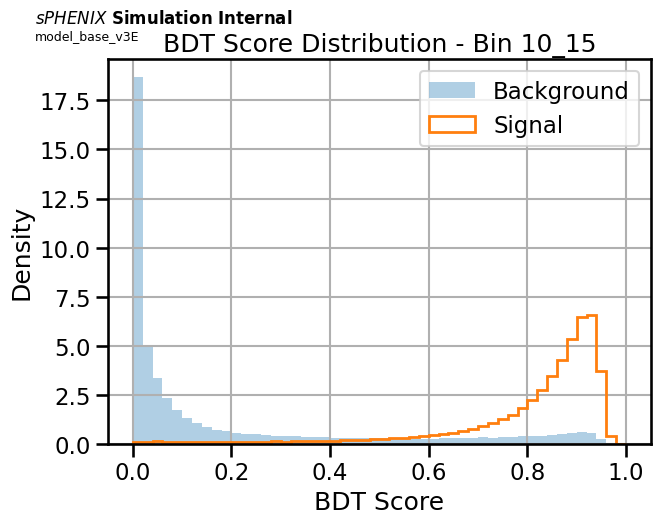

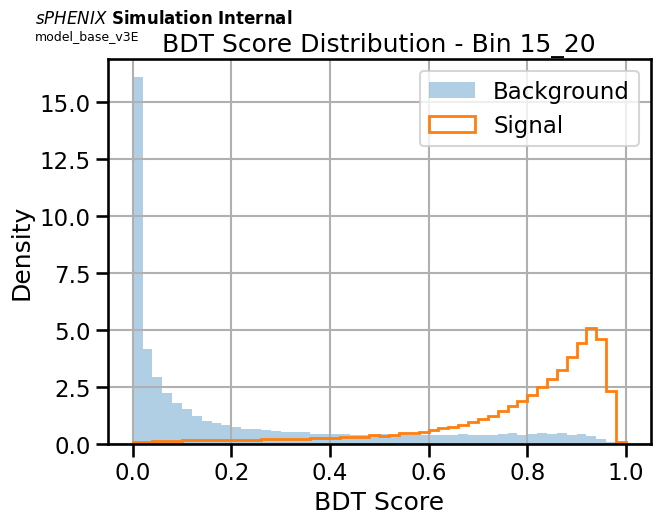

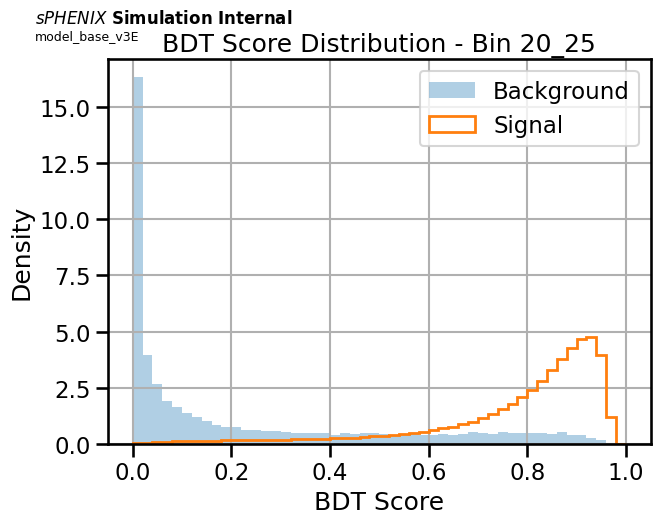

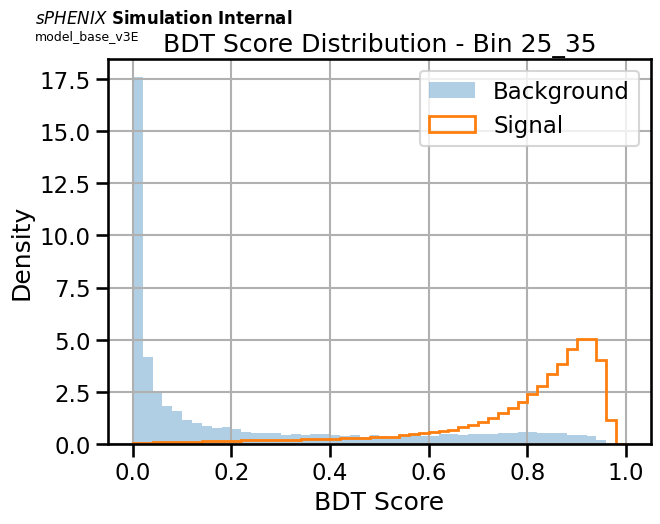

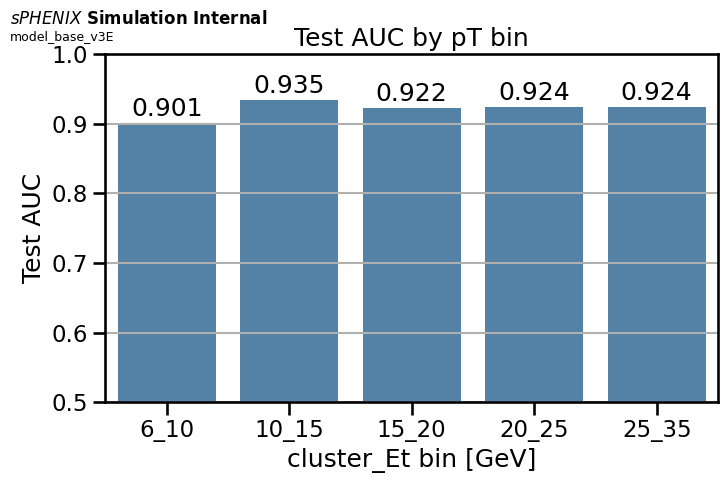

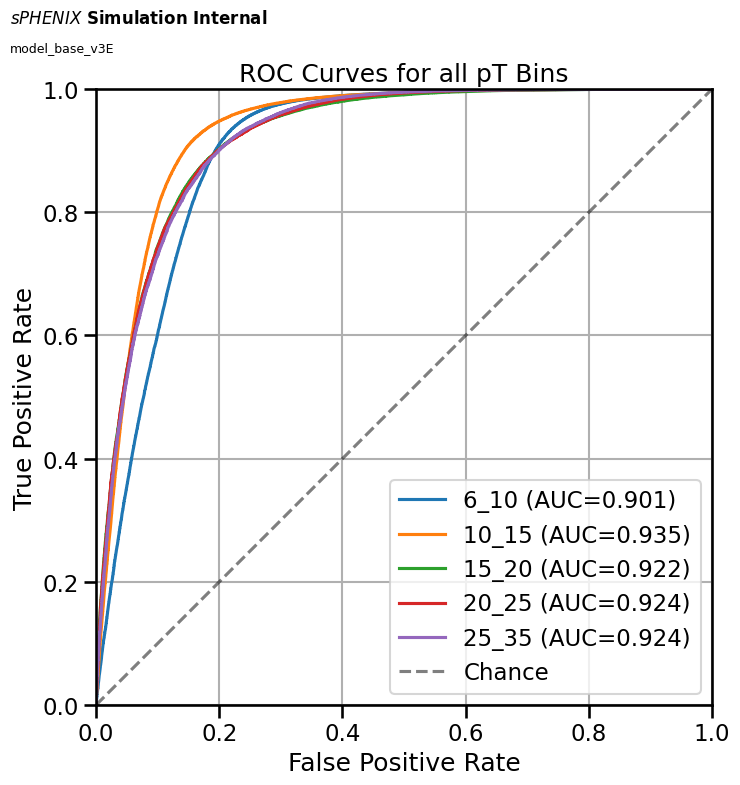

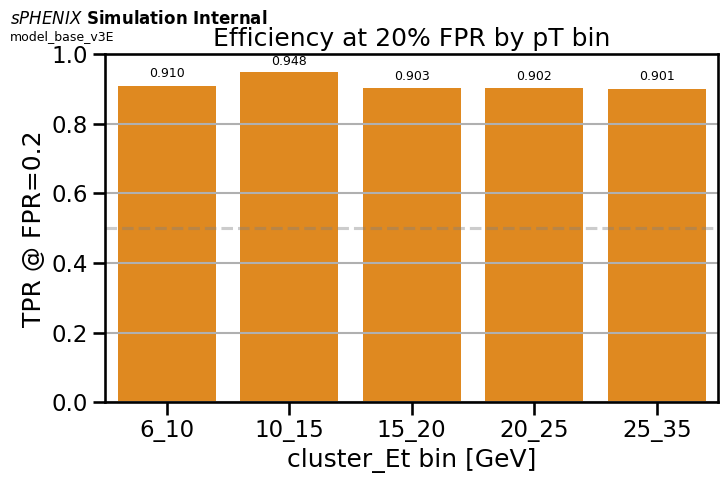

Generating feature importance plots...
Saved: binned_models/model_base_v3E_feature_importance_comparison.pdf


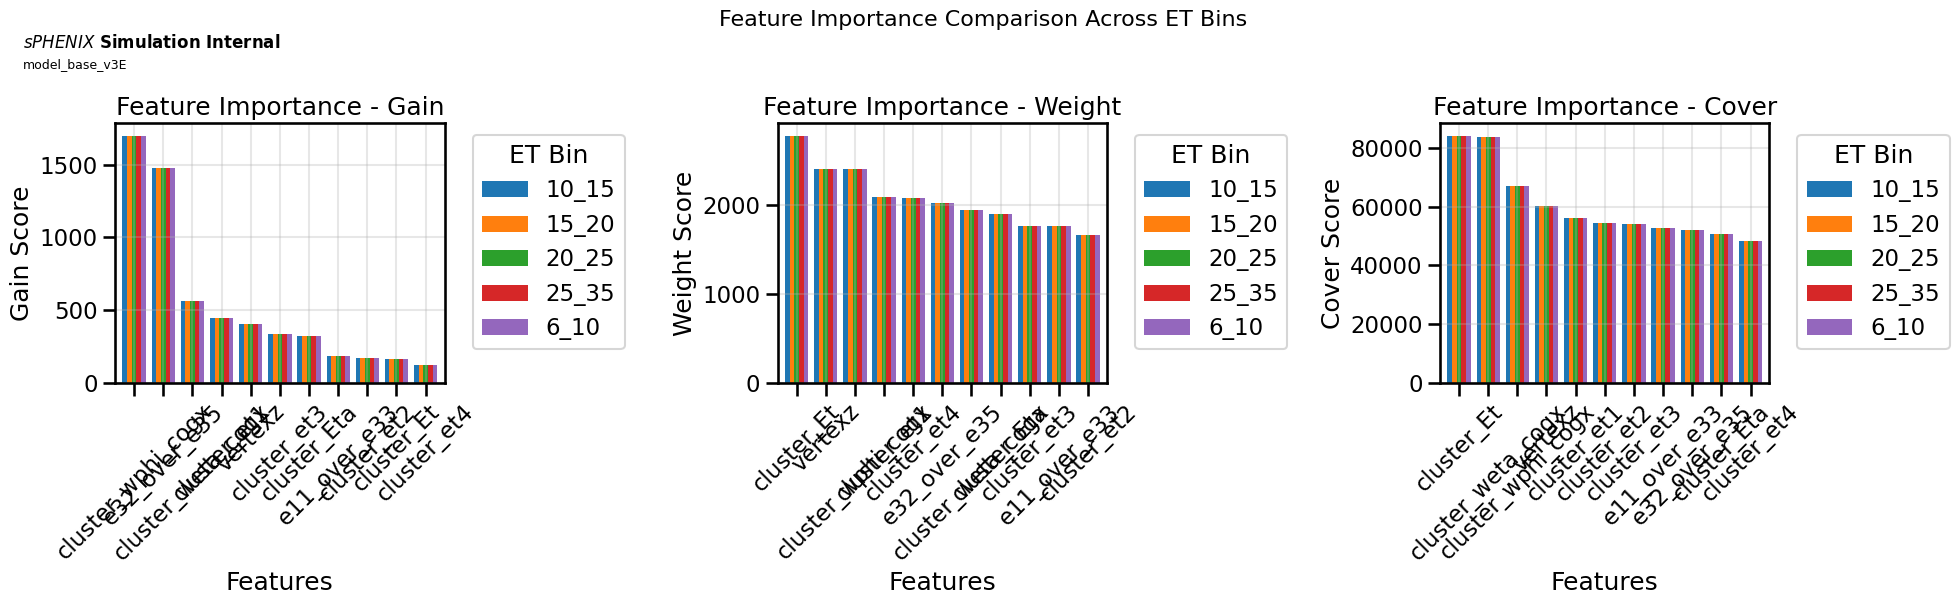

Saved: binned_models/model_base_v3E_feature_importance_heatmap.pdf


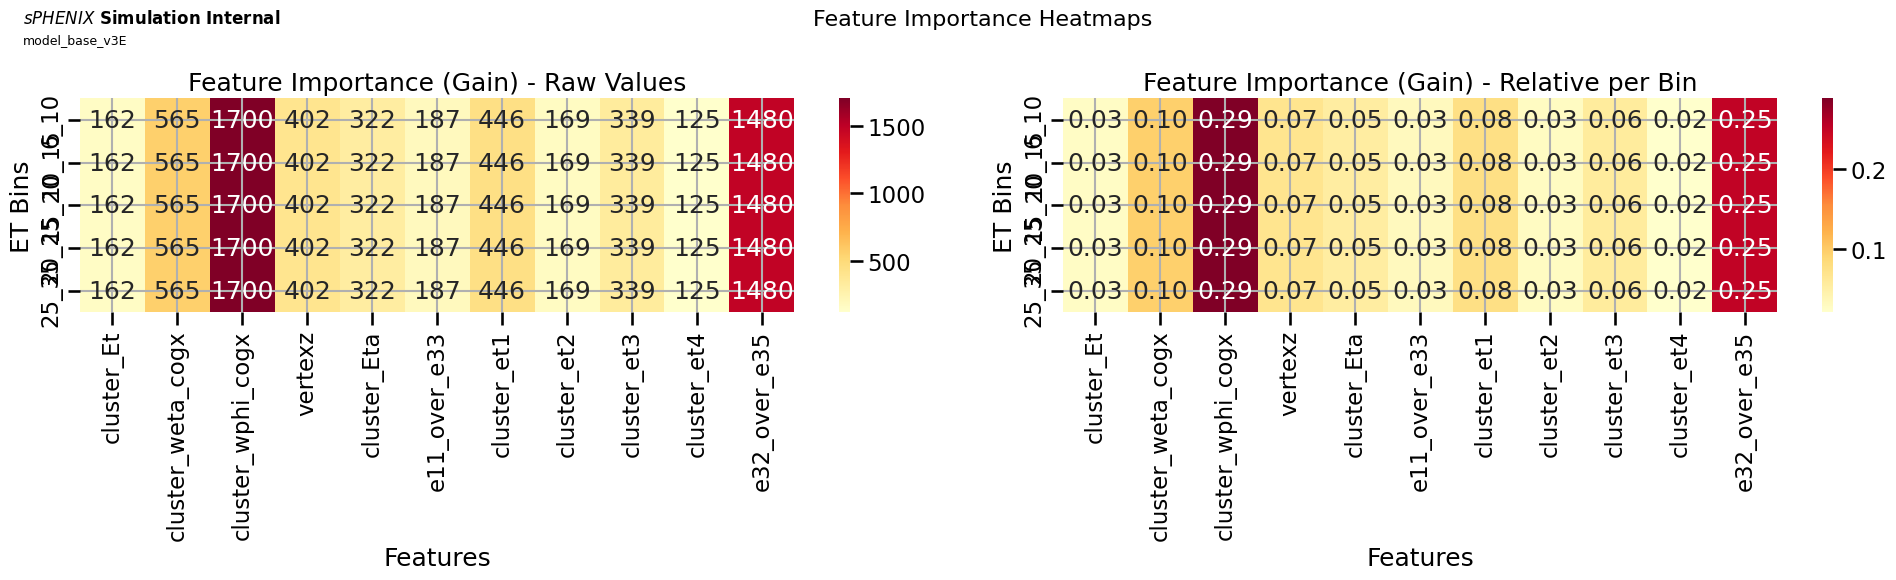

Saved: binned_models/model_base_v3E_top_features_per_bin.pdf


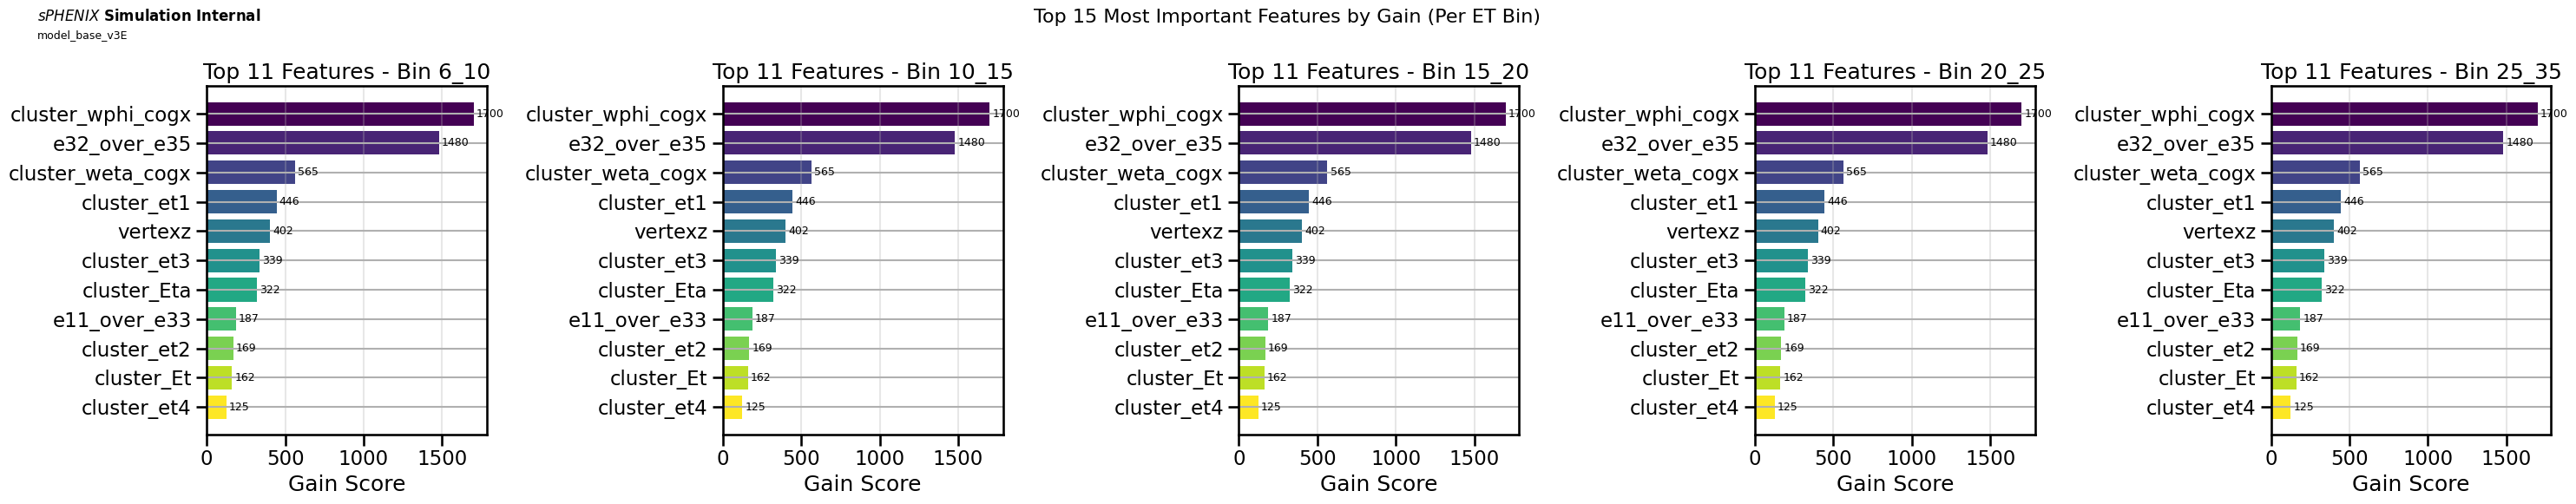

Saved: binned_models/model_base_v3E_isoet_bdt_correlation_global.pdf


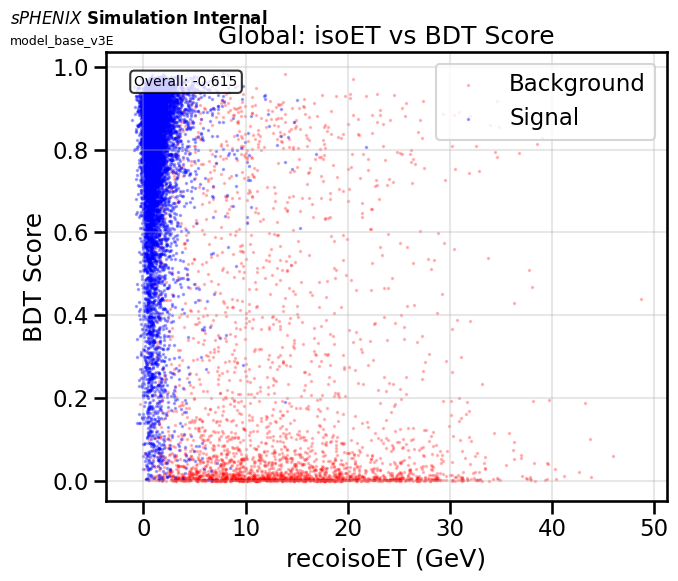

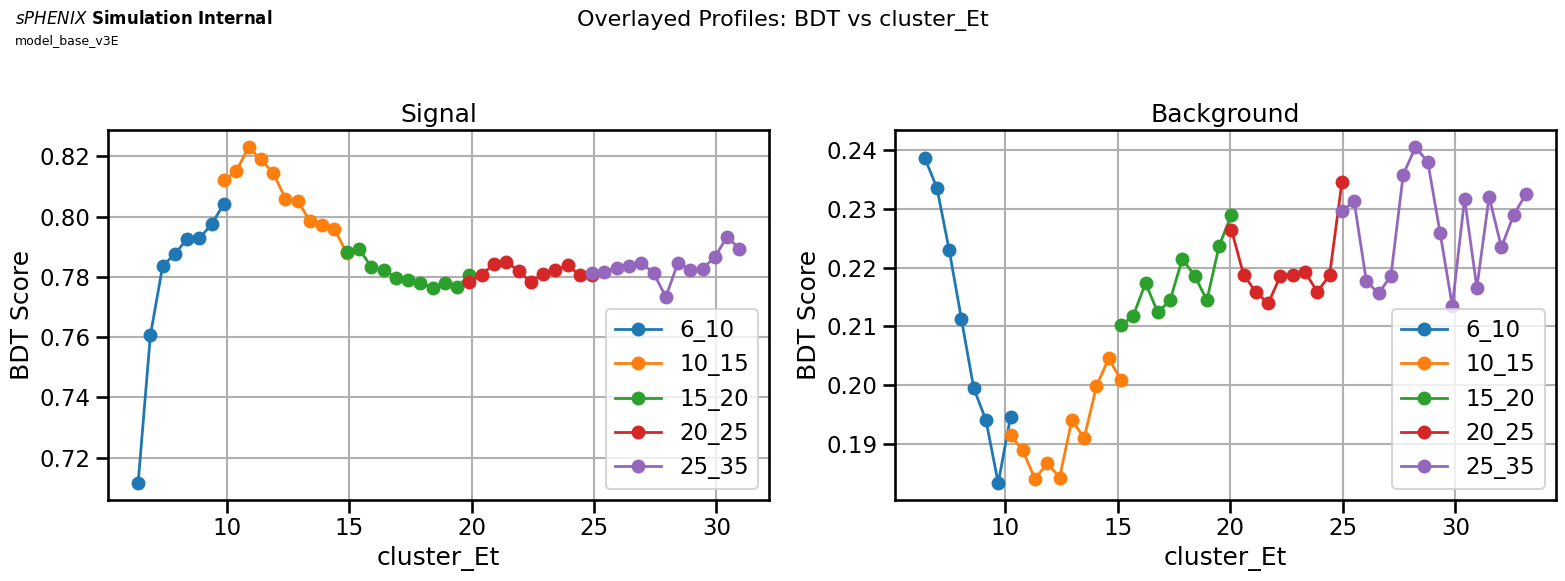

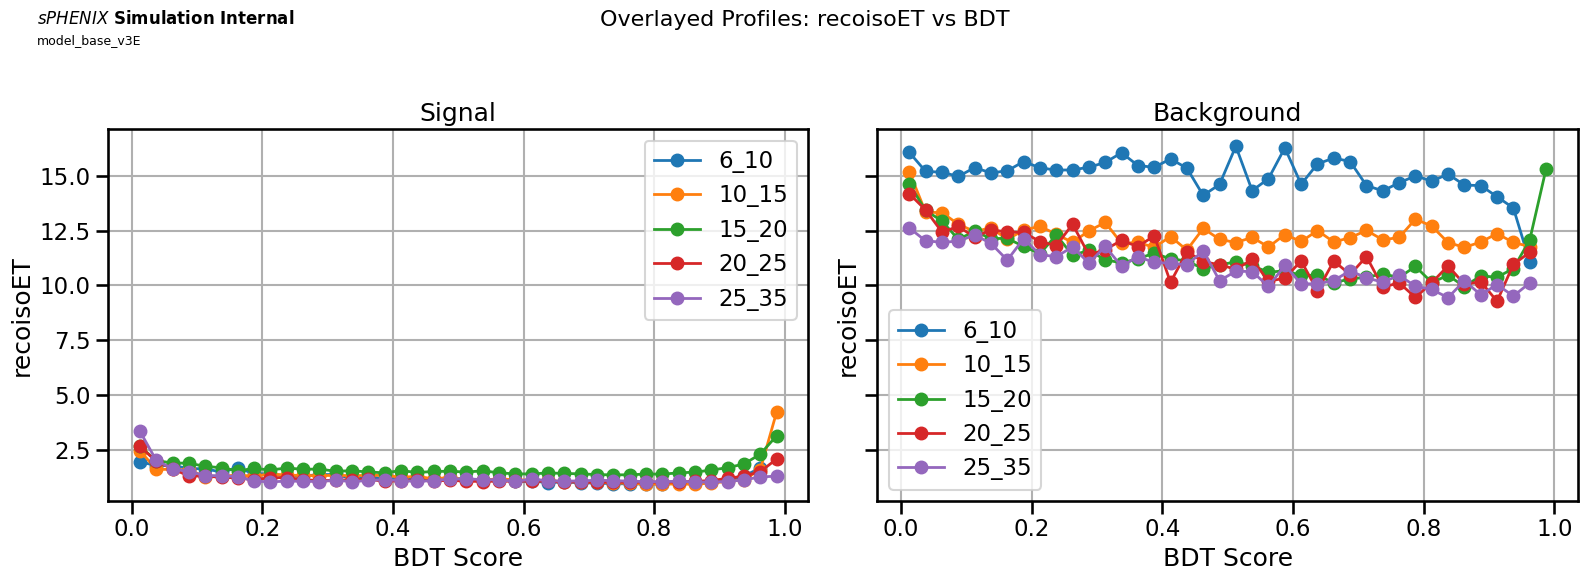

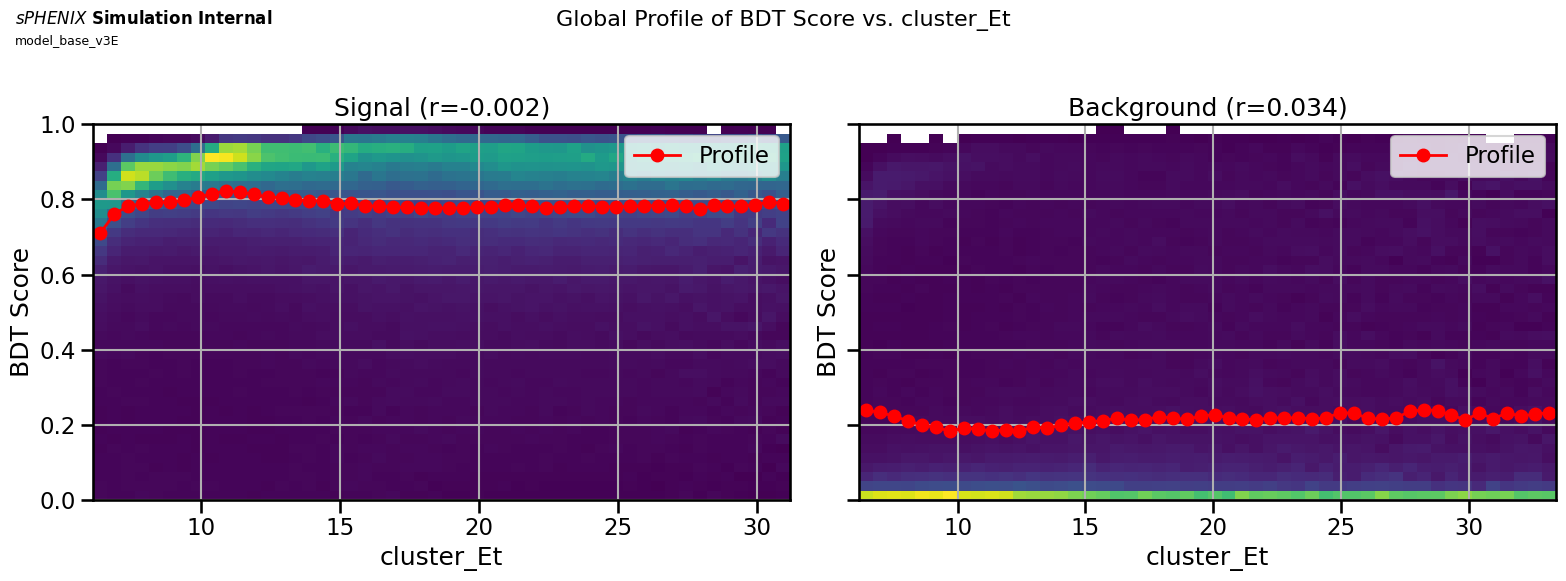

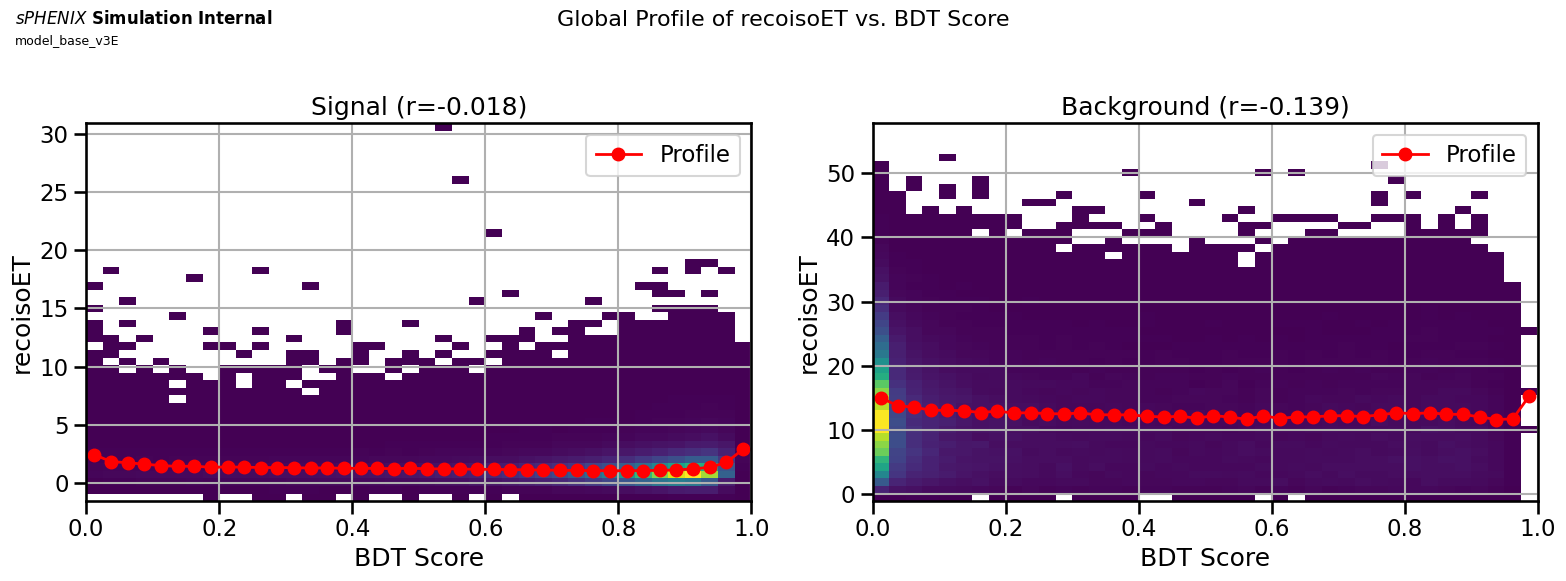

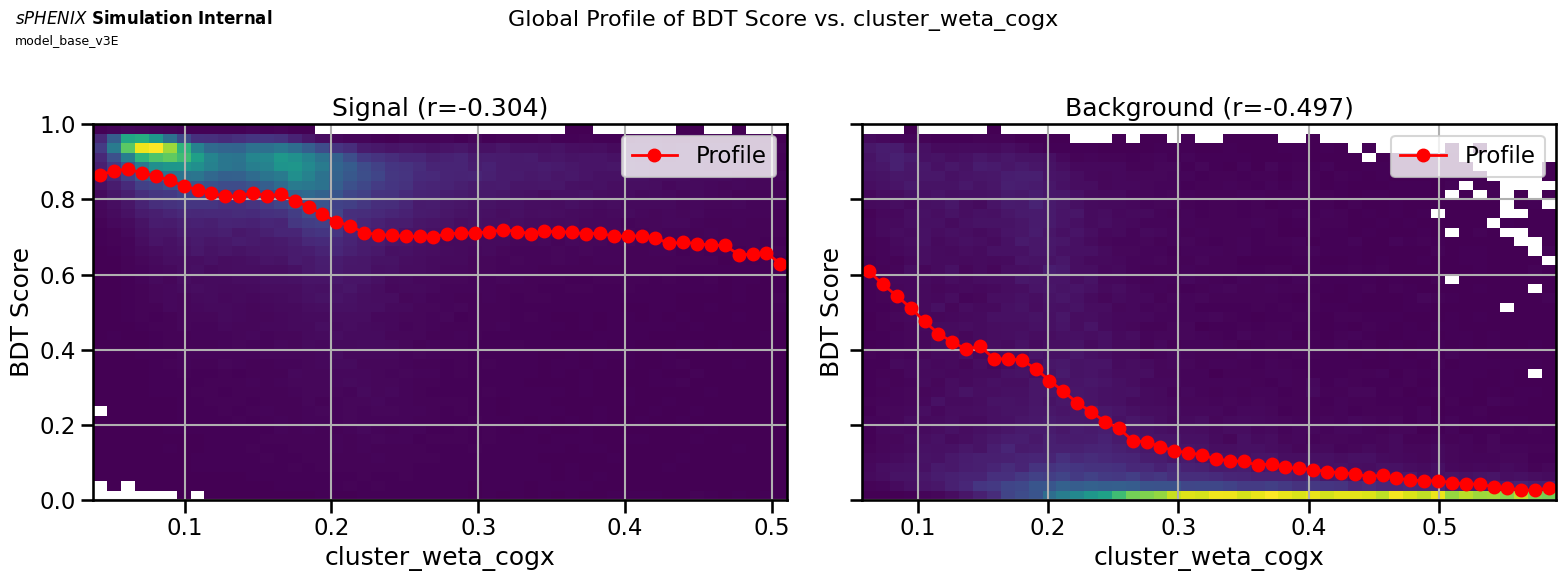

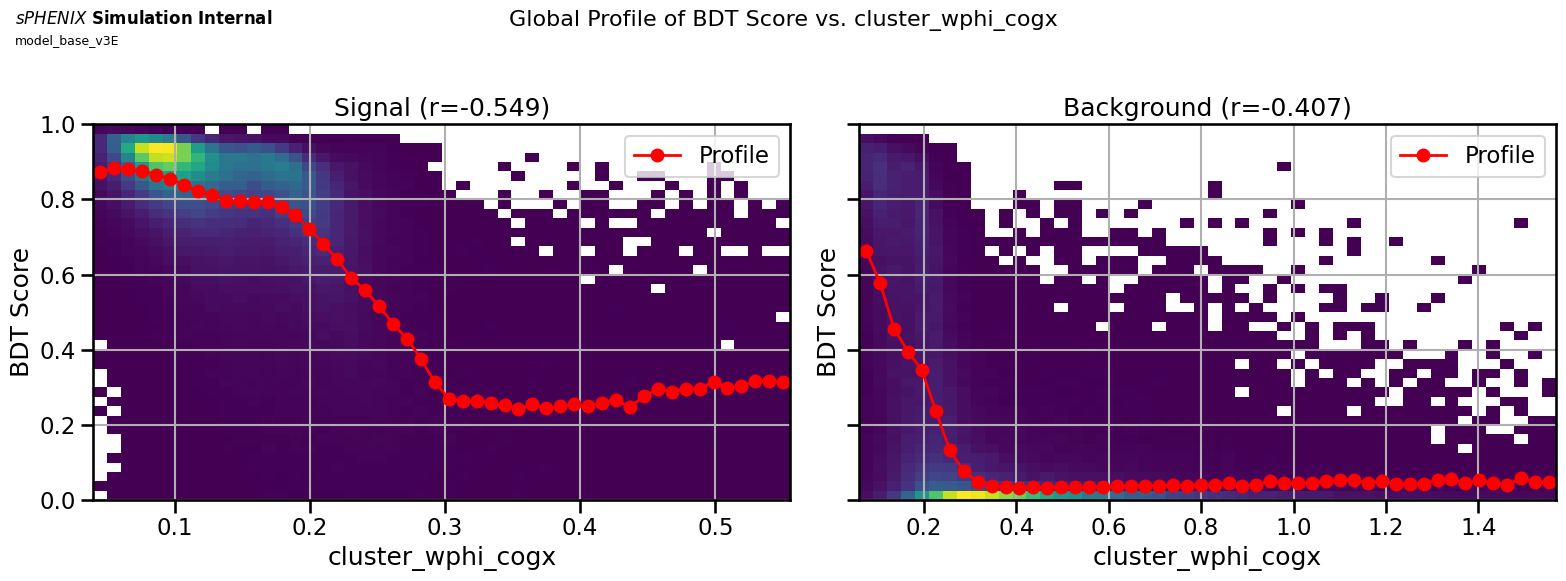

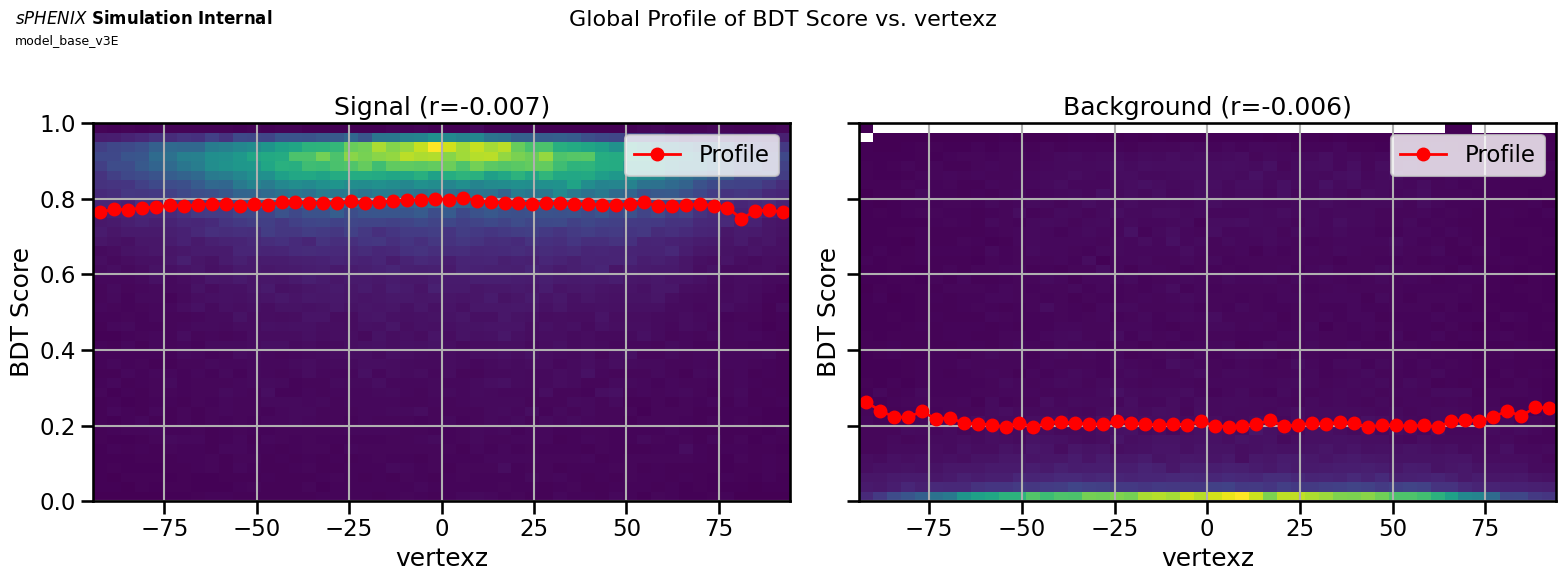

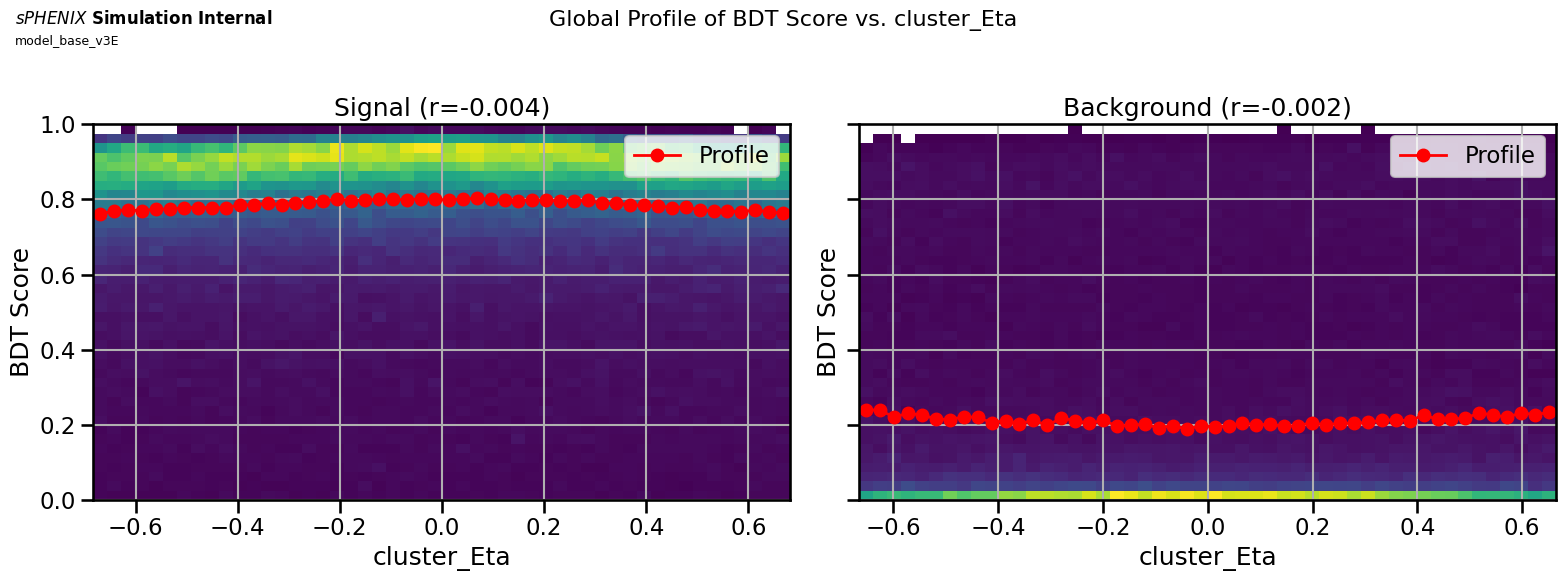

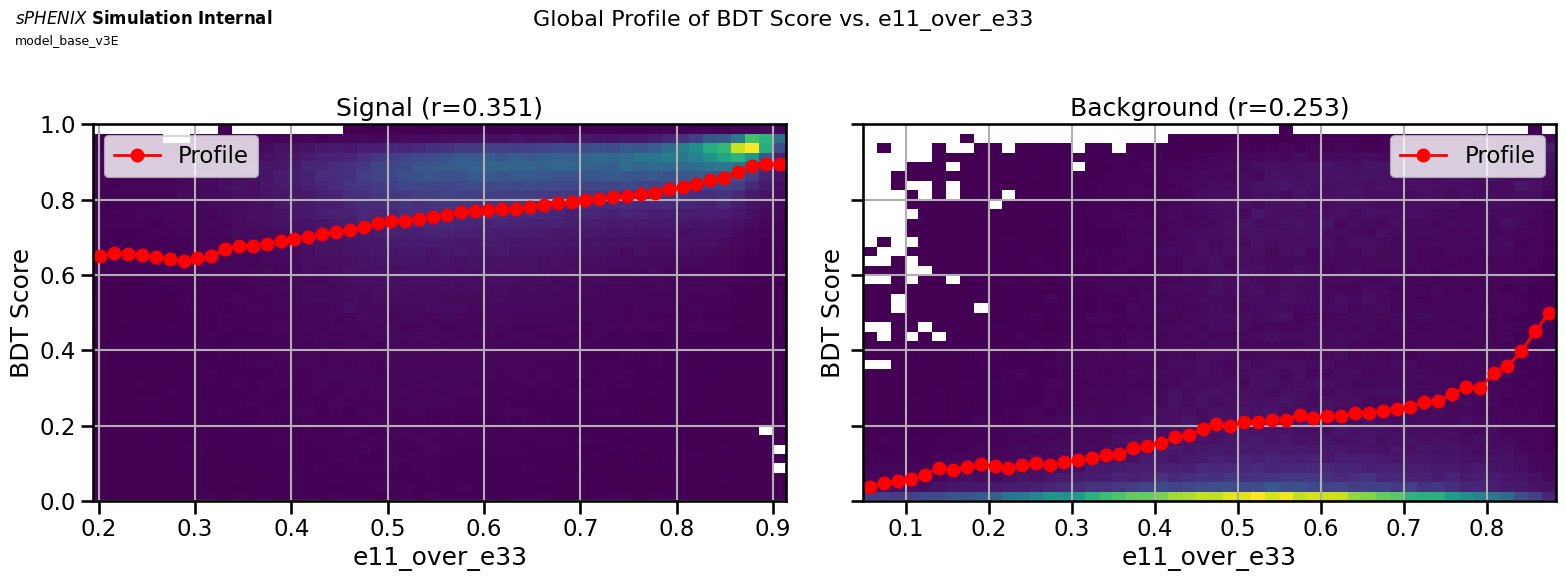

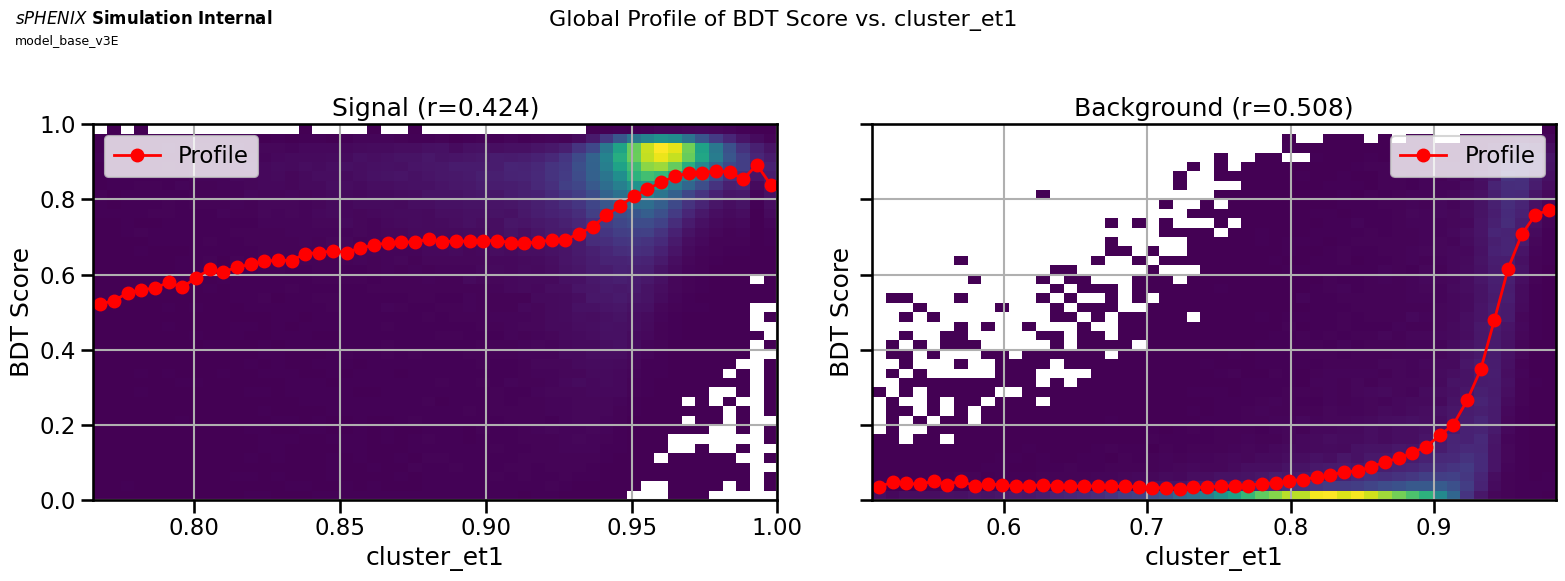

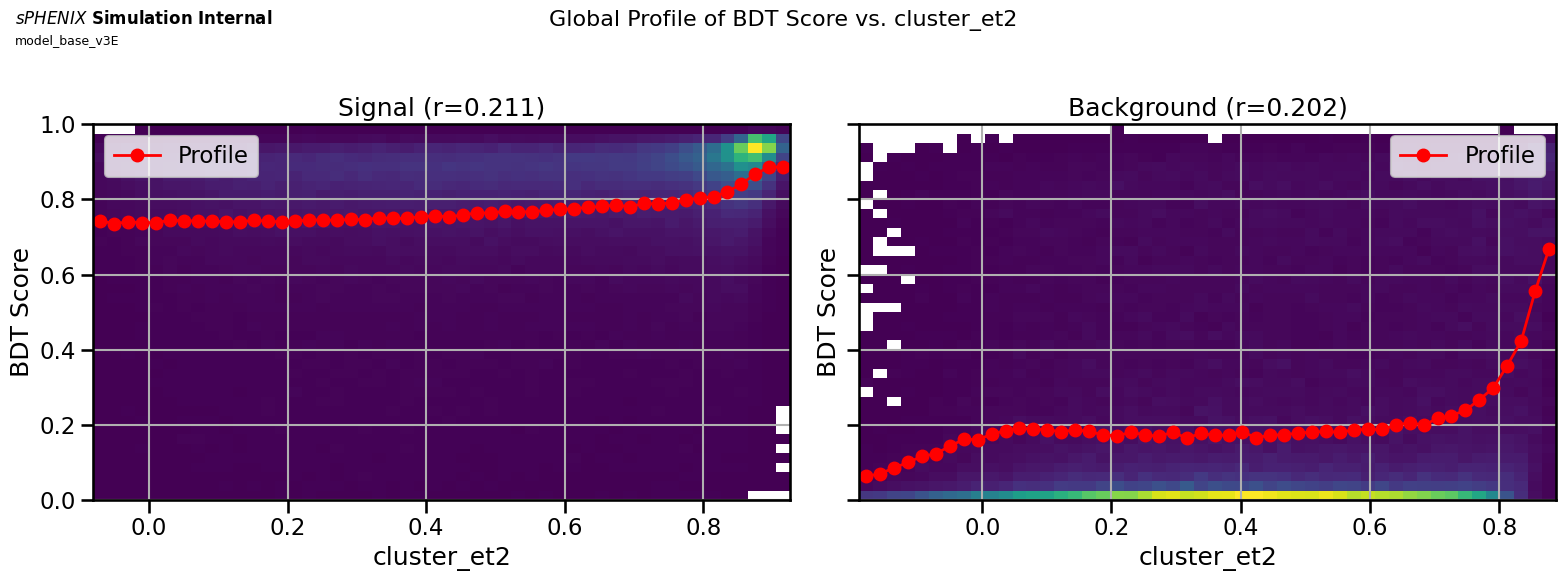

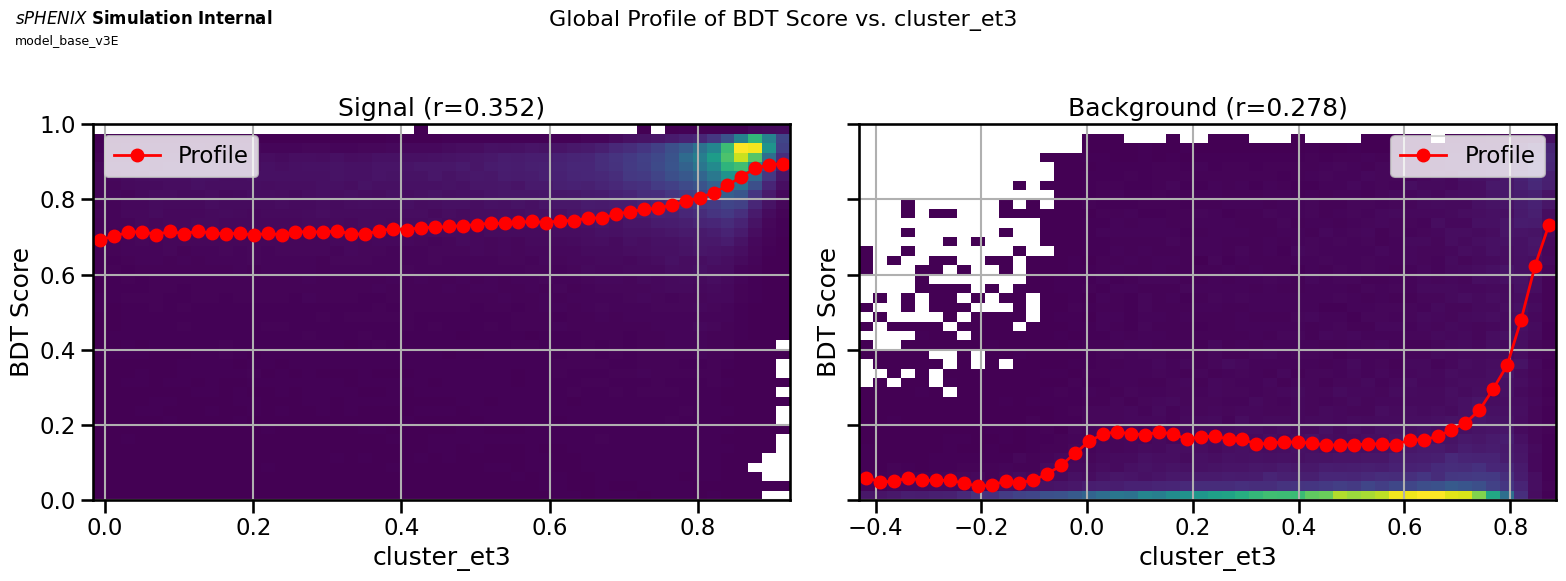

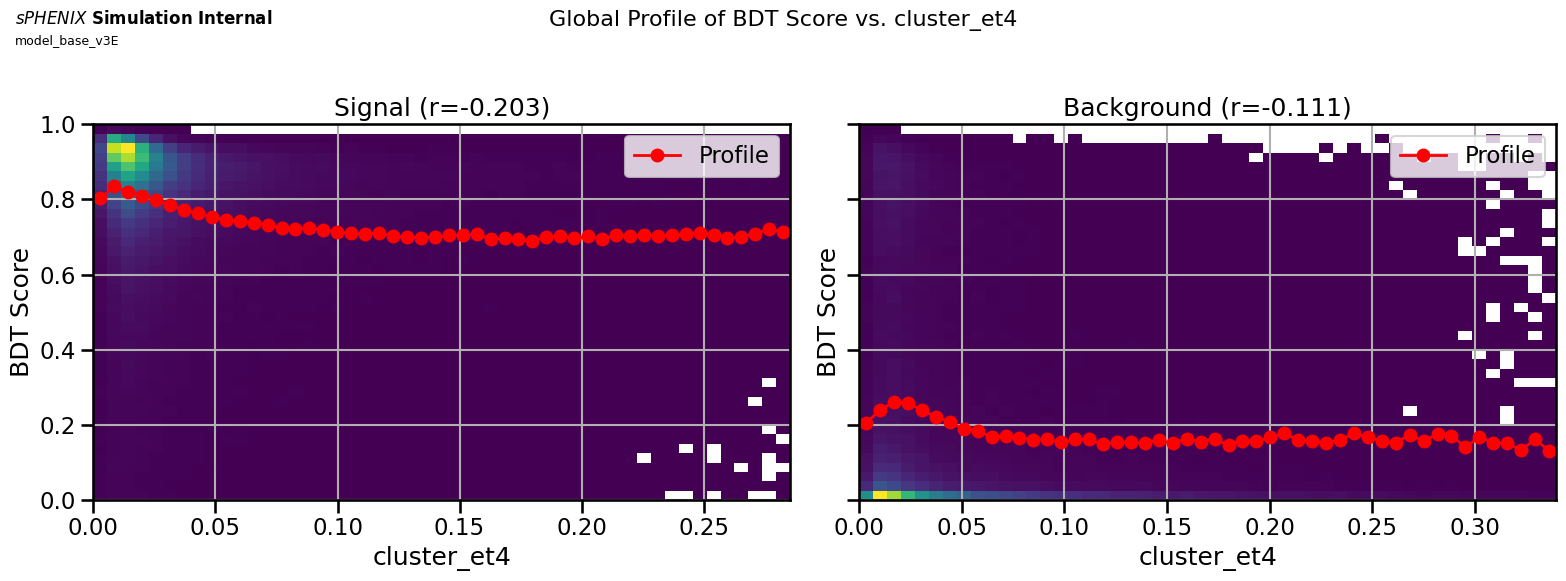

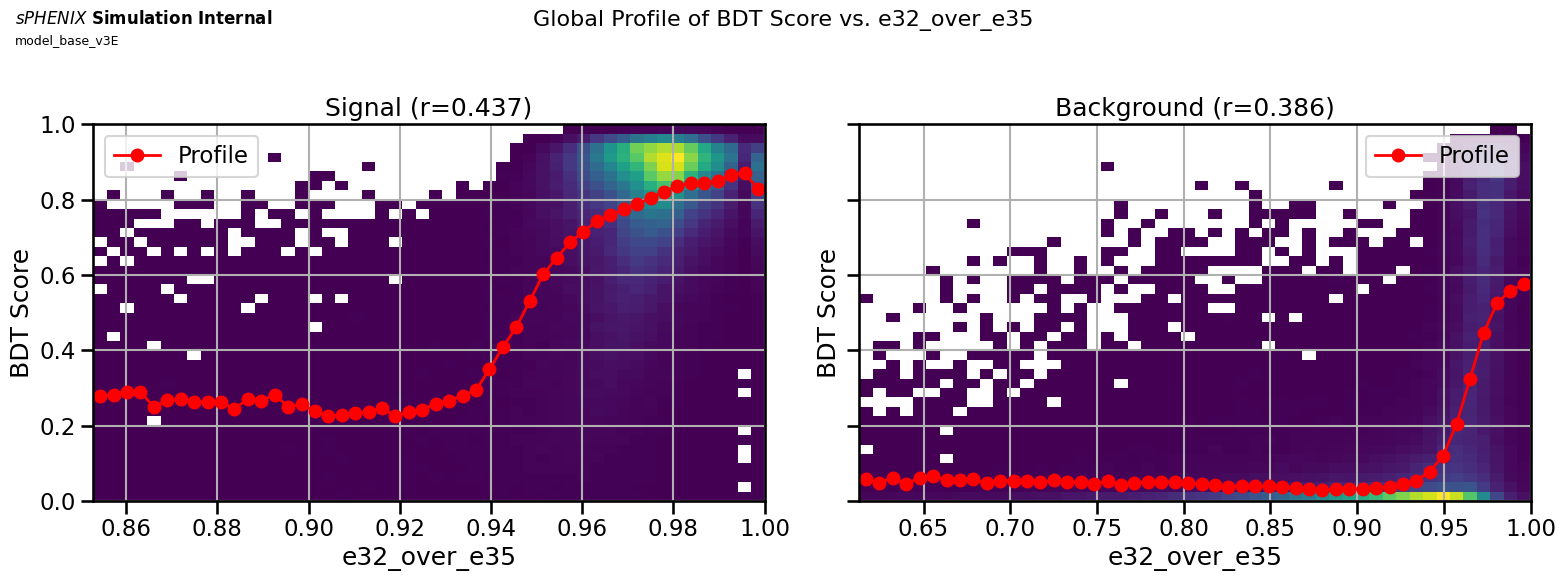

Memory usage: 6397.3 MB
Memory usage: 6396.3 MB
--- Saving Results ---
=== Saving Results ===
Saved model: binned_models/model_6_10.joblib
Saved model: binned_models/model_10_15.joblib
Saved model: binned_models/model_15_20.joblib
Saved model: binned_models/model_20_25.joblib
Saved model: binned_models/model_25_35.joblib
=== Saving TMVA/ROOT Models ===
Saved TMVA model: binned_models/model_base_v3E_single_tmva.root
Saved metrics: binned_models/per_bin_metrics.csv
Saved metadata: binned_models/training_metadata.json
Memory usage: 6396.3 MB
Memory usage: 6396.3 MB
=== Pipeline completed successfully ===


In [10]:
# Test the new 2D correlation plots
print("=== Testing New 2D Correlation Plots ===")

# Create and run the training pipeline
pipeline = BinnedTrainingPipeline("config.yaml")

# Memory monitoring function
import psutil
import os
import gc

def print_memory_usage():
    process = psutil.Process(os.getpid())
    memory_mb = process.memory_info().rss / 1024 / 1024
    print(f"Memory usage: {memory_mb:.1f} MB")

# Monitor memory before starting
print("=== Memory Usage Monitoring ===")
print_memory_usage()

# Run the complete pipeline with memory management
print("--- Running Training ---")
pipeline.run_training()
print_memory_usage()
gc.collect()  # Force garbage collection
print_memory_usage()

print("--- Evaluating Models ---")
pipeline.evaluate_models()
print_memory_usage()
gc.collect()  # Force garbage collection
print_memory_usage()

# Debug: Check data structure before plotting
print("--- Debug: Checking Data Structure ---")
if hasattr(pipeline, "trained_pipelines"):
    print(f"Number of trained pipelines: {len(pipeline.trained_pipelines)}")
    for bin_label, entry in pipeline.trained_pipelines.items():
        print(f"Bin {bin_label}:")
        print(f"  - df_bin shape: {entry["df_bin"].shape if entry["df_bin"] is not None else 'None'}")
        print(f"  - df_bin columns: {entry["df_bin"].columns.tolist() if entry["df_bin"] is not None else 'None'}")
        if entry["df_bin"] is not None:
            if "weight" in entry["df_bin"].columns:
                print(f"  - weight column exists with {len(entry["df_bin"]["weight"])} values")
                print(f"  - weight range: {entry["df_bin"]["weight"].min():.3f} to {entry["df_bin"]["weight"].max():.3f}")
            else:
                print(f"  - weight column MISSING!")
                print(f"  - Available columns: {entry["df_bin"].columns.tolist()}")
                # Create weight column if missing
                print("  - Creating weight column with value 1.0...")
                entry["df_bin"] = entry["df_bin"].copy()  # Create a copy to avoid warnings
                entry["df_bin"]["weight"] = 1.0
                print("  - Weight column created successfully")
                
                # Also check if w_val exists and create if needed
                if "w_val" not in entry or entry["w_val"] is None:
                    print("  - w_val is missing, creating from weight column...")
                    entry["w_val"] = entry["df_bin"]["weight"].values
                    print("  - w_val created successfully")
        else:
            print("- df_bin is None!")

print("--- Generating Plots ---")
pipeline.generate_plots()
print_memory_usage()
gc.collect()  # Force garbage collection
print_memory_usage()

print("--- Saving Results ---")
pipeline.save_results()
print_memory_usage()
gc.collect()  # Final cleanup
print_memory_usage()

print("=== Pipeline completed successfully ===")


In [ ]:
# View Training Results
import pandas as pd

# Get training metrics
if hasattr(pipeline, "_save_metrics"):
    metrics_df = pipeline._save_metrics()
    print("📊 Training Metrics:")
    print(metrics_df.to_string(index=False))
else:
    print("Training metrics not available yet")

# Get correlation results if available
if hasattr(pipeline, "correlation_results"):
    print("📈 Correlation Results:")
    for bin_label, corr_data in pipeline.correlation_results.items():
        print(f"Bin {bin_label}:")
        print(f"  Pearson r: {corr_data["pearson_r"]:.3f}")
        print(f"  Spearman ρ: {corr_data["spearman_rho"]:.3f}")
        print(f"  N pairs: {corr_data["n_pairs"]}")
else:
    print("Correlation results not available yet")


# New Features: Vertex Binning and Reweighting

This refactored version now supports two new features:

## 1. Vertex Distribution Reweighting

You can flatten the vertex z distribution by setting:

```yaml
reweighting:
  vertex_reweight: true  # Enable vertex distribution flattening
  vertex_reweight_bins: 20  # Number of bins for reweighting
  vertex_reweight_max: 50.0  # Maximum weight cap
```

This helps ensure uniform representation across different vertex z positions.

**Quality Assurance**: When enabled, vertex distribution plots (before/after reweighting) are automatically included in the global reweighting QA plot.

## 2. Vertex Binning (Alternative to pT Binning)

Instead of training models in pT bins, you can train in vertex z bins:

```yaml
binning:
  mode: vertex  # Switch from "pt" to "vertex" binning
  vertex_edges: [-10.0, -5.0, 0.0, 5.0, 10.0]  # Vertex z bin edges in cm
  vertex_labels: ['backward', 'central', 'forward', 'far_forward']  # Bin labels
```

When using vertex binning:
- Models are trained separately for different vertex z regions
- No pT binning is applied (as requested)
- Useful for studying detector acceptance and efficiency vs vertex position

## Configuration Priority

- **Reweighting** is always applied first (before binning)
- **Binning mode** determines how data is split for training
- Both features can be used independently or together


In [ ]:
# Example: Configure vertex binning and reweighting
# Uncomment and modify the config to enable vertex features

example_vertex_config = """
# To enable vertex reweighting (flattens vertex distribution):
reweighting:
  vertex_reweight: true
  vertex_reweight_bins: 20
  vertex_reweight_max: 50.0

# To switch to vertex binning instead of pT binning:
binning:
  mode: vertex  # Change from "pt" to "vertex"
  vertex_edges: [-10.0, -5.0, 0.0, 5.0, 10.0]
  vertex_labels: ['backward', 'central', 'forward', 'far_forward']

# When using vertex binning, typically set:
training:
  train_single_model: false  # Train separate models per vertex bin
"""

print("Example configuration for vertex features:")
print(example_vertex_config)

# Check current configuration
print("\nCurrent configuration:")
print(f"Binning mode: {config['binning'].get('mode', 'pt')}")
print(f"Vertex reweighting: {config['reweighting'].get('vertex_reweight', False)}")

if config['binning'].get('mode', 'pt') == 'vertex':
    print(f"Vertex bins: {config['binning']['vertex_labels']}")
else:
    print(f"pT bins: {config['binning']['labels']}")
    
print("\n=== Plotting Features ===")
if config['reweighting'].get('vertex_reweight', False):
    print("✓ Vertex reweighting plots will be included in global QA")
else:
    print("• To see vertex before/after plots, set vertex_reweight: true")
    print("• Test with config_vertex_test.yaml to see vertex features")


## Testing TMVA Model Saving


```cpp
#include <TMVA/RBDT.hxx>
using namespace TMVA::Experimental;

// Load the TMVA model
RBDT bdt("myBDT", "binned_models/model_single_tmva.root");

// Make predictions
float prediction = bdt.Compute(features);
```

The TMVA models are automatically saved when `save_tmva: true` is set in the configuration.
